In [9]:
from __future__ import print_function, division
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)


testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


Files already downloaded and verified
Files already downloaded and verified


In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=False)


classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

foreground_classes = {'horse','ship', 'truck'}

background_classes = {'plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog'}

# print(type(foreground_classes))

In [8]:
dataiter = iter(trainloader)
background_data=[]
background_label=[]
foreground_data=[]
foreground_label=[]
batch_size=10
for i in range(5000):
    images, labels = dataiter.next()
    for j in range(batch_size):
        if(classes[labels[j]] in background_classes):
            img = images[j].tolist()
            background_data.append(img)
            background_label.append(labels[j])
        else:
            img = images[j].tolist()
            foreground_data.append(img)
            foreground_label.append(labels[j])
            
foreground_data = torch.tensor(foreground_data)
foreground_label = torch.tensor(foreground_label)
background_data = torch.tensor(background_data)
background_label = torch.tensor(background_label)
    

In [ ]:
print(foreground_data.size())
print(background_data.size())
torch.save(foreground_data,'foreground_data.pt')
torch.save(background_data,'background_data.pt')
torch.save(foreground_label,'foreground_label.pt')
torch.save(background_label,'background_label.pt')
# torch.load()

torch.Size([15000, 3, 32, 32])
torch.Size([35000, 3, 32, 32])


In [6]:
torch.load('foreground_data.pt')
# print(foreground_data.size())
# print(background_data.size())

tensor([4, 6, 5,  ..., 1, 5, 0])

In [4]:
import torch
foreground_data = torch.load('foreground_data.pt')
background_data = torch.load('background_data.pt')
foreground_label = torch.load('foreground_label.pt')
background_label = torch.load('background_label.pt')
print(fd.size(),bd.size())

torch.Size([15000, 3, 32, 32]) torch.Size([35000, 3, 32, 32])


In [40]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

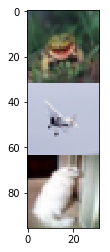

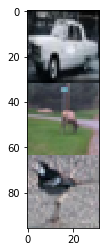

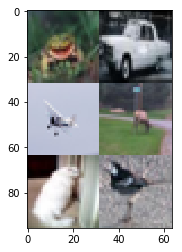

torch.Size([3, 96, 32])


In [45]:
img1 = torch.cat((background_data[0],background_data[1],background_data[2]),1)
imshow(img1)
img2 = torch.cat((background_data[27],background_data[3],background_data[43]),1)
imshow(img2)
img3 = torch.cat((img1,img2),2)
imshow(img3)
print(img2.size())

In [25]:
print(np.random.randint(1,15000,8))

[10225   325  5952  9128  3774  8300  1601  2663]


In [58]:
def create_mosaic_img(bg_idx,fg_idx,fg):
    image_dict ={}
    j=0
    for i in range(9):
        if i != fg:
            image_dict['img'+str(i)] = background_data[bg_idx[j]]
            j+=1
        else: 
            image_dict['img'+str(i)] = foreground_data[fg_idx]
#     print(image_dict)
    row1 = torch.cat((image_dict['img0'],image_dict['img1'],image_dict['img2']),2)
    row2 = torch.cat((image_dict['img3'],image_dict['img4'],image_dict['img5']),2)
    row3 = torch.cat((image_dict['img6'],image_dict['img7'],image_dict['img8']),2)
    mosaic = torch.cat((row1,row2,row3),1)
    return mosaic

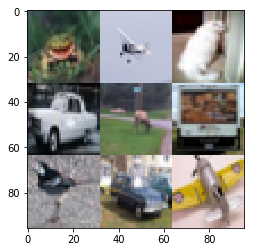

In [60]:
desired_num = 1000
# bg_idx = np.random.randint(0,35000,8)
# fg_idx = np.random.randint(0,15000)
# fg = np.random.randint(0,9)
# print(bg_idx, fg_idx,fg)
bg_idx = [0,1,2,27,3,43,99,155]
fg_idx = 1
fg = 5
collage = create_mosaic_img(bg_idx,fg_idx,fg)
imshow(collage)

In [6]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
#     print(img)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(len(images))

# show images
imshow(torchvision.utils.make_grid(images))
print(labels)
print(' '.join('%5s' % classes[labels[j]] for j in range(10)))

NameError: name 'trainloader' is not defined

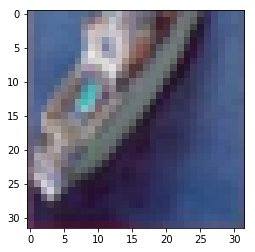

tensor([0, 1, 2, 3, 4, 5, 6])


In [17]:
#print(data)
imshow(foreground_data[1])
print(background_label.unique())

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()